
Top 5 en Pass:
                                 player  type  count
265             Cristian Gabriel Romero  Pass    352
358               Davinson Sánchez Mina  Pass    345
760         Johan Andrés Mojica Palacio  Pass    327
997                   Lisandro Martínez  Pass    326
511  Federico Santiago Valverde Dipetta  Pass    308

Top 5 en Shot:
                                 player  type  count
348        Darwin Gabriel Núñez Ribeiro  Shot     21
874         José Salomón Rondón Giménez  Shot     19
513  Federico Santiago Valverde Dipetta  Shot     17
918         Julio César Enciso Espínola  Shot     14
993      Lionel Andrés Messi Cuccittini  Shot     14

Top 5 en Ball Recovery:
                                  player           type  count
725            Jhon Adolfo Arias Andrade  Ball Recovery     40
98                       Alphonso Davies  Ball Recovery     38
834          José Andrés Martínez Torres  Ball Recovery     38
1066               Manuel Ugarte Ribeiro  Ball Recovery

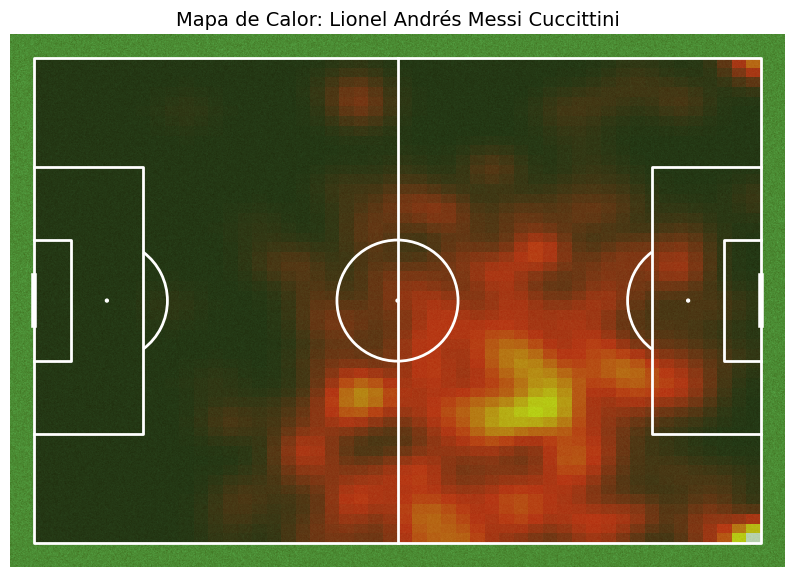

In [2]:
# 04_analisis_jugadores.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer import Pitch
from scipy.ndimage import gaussian_filter
import numpy as np

# Cargar el archivo consolidado de eventos
ruta = "C:/Users/Usuario/OneDrive/Documentos/Cursos/Sport Data Campus/Master en Python Avanzado al deporte/Modulo 11/Proyecto Final/Data/eventos_copa_america/eventos_copa_america_2024.csv"
df = pd.read_csv(ruta, low_memory=False)

# Filtrar algunos eventos de interés
eventos_interes = ["Pass", "Shot", "Ball Recovery", "Pressure", "Interception", "Block"]

# Filtrar solo esos eventos
df_eventos = df[df['type'].isin(eventos_interes)]

# Top jugadores por tipo de evento
top_eventos = df_eventos.groupby(['player', 'type']).size().reset_index(name='count')
top_jugadores = top_eventos.sort_values(['type', 'count'], ascending=[True, False])

# Mostrar top 5 por tipo de evento
for evento in eventos_interes:
    print(f"\nTop 5 en {evento}:")
    print(top_jugadores[top_jugadores['type'] == evento].head())

# Función para graficar el mapa de calor de un jugador
def mapa_calor_jugador(df, jugador):
    eventos = df[(df['player'] == jugador) & (df['location'].notna())]
    locations = np.array([eval(loc) for loc in eventos['location']])

    fig, ax = plt.subplots(figsize=(10, 7))
    pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
    pitch.draw(ax=ax)

    heatmap, xedges, yedges = np.histogram2d(
        locations[:, 0], locations[:, 1], bins=[50, 50], range=[[0, 120], [0, 80]]
    )
    heatmap = gaussian_filter(heatmap, sigma=1.5)
    ax.imshow(heatmap.T, extent=(0, 120, 0, 80), origin='lower', cmap='hot', alpha=0.6)
    ax.set_title(f"Mapa de Calor: {jugador}", fontsize=14)
    plt.show()

# Ejemplo de uso
jugador_ejemplo = "Lionel Andrés Messi Cuccittini"
mapa_calor_jugador(df, jugador_ejemplo)
